# Real Estate - Sale Price Prediction

In [1]:
# Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, auc
import seaborn as sns
import pickle

# Read Data

In [ ]:
df1=pd.read_csv("/content/1990to1999.csv")
df1

In [ ]:
df1.duplicated(['month','street_name','town','flat_type','block','storey_range','flat_model','floor_area_sqm','lease_commence_date'],
                     keep=False)==True

In [ ]:
df2=pd.read_csv("/content/2000to2012.csv")
df2

In [ ]:
df3=pd.read_csv("/content/2012to2014.csv")
df3

In [ ]:
df4=pd.read_csv("/content/2015to2016.csv")
df4

In [ ]:
df5=pd.read_csv("/content/2017to2023.csv")
df5

# Merge all dataset

In [ ]:
df6=pd.merge(df1,df2, how="outer")
df6=pd.merge(df6,df3, how="outer")
df6=pd.merge(df6,df4, how="outer")
df6.head(3)

In [ ]:
df6=pd.concat([df6,df5])
df6

In [ ]:
df6.to_csv("/content/realestate.csv")

In [2]:
df_realestate=pd.read_csv("/content/realestate.csv")

<ipython-input-2-1964cebd2461>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_realestate=pd.read_csv("/content/realestate.csv")


In [ ]:
df_realestate.head(3)

# Pre processing / Data Cleaning

In [ ]:
df_realestate.info()

# Finding Null values

In [ ]:
null_data=df_realestate.isnull().mean()*100
null_data

In [3]:
# 77% of the data is missing
df_realestate.drop(['remaining_lease','Unnamed: 0'],axis=1,inplace=True)

# Finding Duplicates

In [5]:
# Check duplicate rows
dup_data=df_realestate.duplicated(['month','town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date'],
                     keep=False)
dup_data.sum()

853

In [4]:
df_realestate.drop_duplicates(subset=['month','town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date'],
                     keep=False, inplace=True)

# Finding Zero Values

In [ ]:
col_with_zero = []
for i in df_realestate.columns:
    perc_zero = (df_realestate[i]==0).mean()*100
    col_with_zero.append((i,perc_zero))

zero_percent = pd.DataFrame(col_with_zero,columns=['column_name','zero_percentage']).sort_values("zero_percentage",ascending=False)
zero_percent

# EDA

# Finding Outliers

In [ ]:
df_realestate.info()

In [ ]:
df_realestate['flat_model'].unique()

In [6]:
# Mapping with exact values
mapping= {'IMPROVED':'Improved', 'NEW GENERATION':'New Generation','MODEL A':'Model A',
          'STANDARD':'Standard', 'SIMPLIFIED':'Simplified',
          'MODEL A-MAISONETTE':'Model A-Maisonette','APARTMENT':'Apartment','MAISONETTE':'Maisonette','TERRACE':'Terrace',
          '2-ROOM':'2-room','IMPROVED-MAISONETTE':'Improved-Maisonette','MULTI GENERATION':'Multi Generation',
          'PREMIUM APARTMENT':'Premium Apartment', 'Improved':'Improved',
          'New Generation':'New Generation',  'Model A':'Model A','Standard':'Standard',
          'Apartment':'Apartment',      'Simplified':'Simplified',
          'Model A-Maisonette':'Model A-Maisonette',
          'Maisonette':'Maisonette','Multi Generation':'Multi Generation',
          'Adjoined flat':'Adjoined flat', 'Premium Apartment':'Premium Apartment',
          'Terrace':'Terrace',  'Improved-Maisonette':'Improved-Maisonette',
          'Premium Maisonette':'Premium Maisonette','2-room':'2-room',
          'Model A2':'Model A2','DBSS':'DBSS','Type S1':'Type S1','Type S2':'Type S2',
          'Premium Apartment Loft':'Premium Apartment',
          '3Gen':'3Gen'}
df_realestate['flat_model'] = df_realestate['flat_model'].map(mapping)

In [ ]:
df_realestate['flat_model'].unique()

In [ ]:
df_realestate['flat_type'].unique()

In [7]:
mapping= {'MULTI-GENERATION':'MULTI GENERATION', 'MULTI GENERATION':'MULTI GENERATION',
          '1 ROOM':'1 ROOM', '2 ROOM':'2 ROOM', '3 ROOM':'3 ROOM',
          '4 ROOM':'4 ROOM', '5 ROOM':'5 ROOM', 'EXECUTIVE':'EXECUTIVE'}
df_realestate['flat_type'] = df_realestate['flat_type'].map(mapping)

In [8]:
# split month col into year and month col
df_realestate['sale_year']=df_realestate['month'].apply(lambda x:x.split('-')[0])
df_realestate['sale_month']=df_realestate['month'].apply(lambda x:x.split('-')[1])

In [9]:
# drop month, street name col
df_realestate.drop('month',axis=1,inplace=True)
df_realestate.drop('street_name',axis=1,inplace=True)

In [27]:
df_realestate['storey_range'].unique()

array(['04 TO 06', '07 TO 09', '01 TO 03', '10 TO 12', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [10]:
# Storey range diff is 3 for all the rows
df_realestate.drop('storey_range',axis=1,inplace=True)

In [11]:
# replace block col with only number
lis=['A','B','C','D','E','F','J','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
for i in lis:
    df_realestate['block']=df_realestate['block'].replace(i,'',regex=True)

In [ ]:
df_realestate['block'].value_counts()

In [12]:
# change into number
df_realestate['block']=df_realestate['block'].astype(int)

In [ ]:
df_realestate.info()

In [ ]:
df_realestate.head(3)

In [13]:
# change year and month into number
df_realestate['sale_year']=df_realestate['sale_year'].astype(int)
df_realestate['sale_month']=df_realestate['sale_month'].astype(int)

In [33]:
#  identity duplicates based on below col values
dup_data=df_realestate.duplicated(['town','flat_type','block','floor_area_sqm','flat_model','lease_commence_date','resale_price','sale_year','sale_month'],
                     keep=False)
dup_data.sum()

5868

In [14]:
# drop duplicates
df_realestate.drop_duplicates(subset=['town','flat_type','block','floor_area_sqm','flat_model','lease_commence_date','resale_price','sale_year','sale_month'],
                     keep=False, inplace=True)

In [15]:
# encoding object columns town and flat model
lab_encoder = LabelEncoder()
df_realestate_1=df_realestate.copy()
for i in df_realestate_1.select_dtypes(include=['object']).columns:
    df_realestate_1[i] = lab_encoder.fit_transform(df_realestate_1[i])

In [ ]:
df_realestate_1.info()

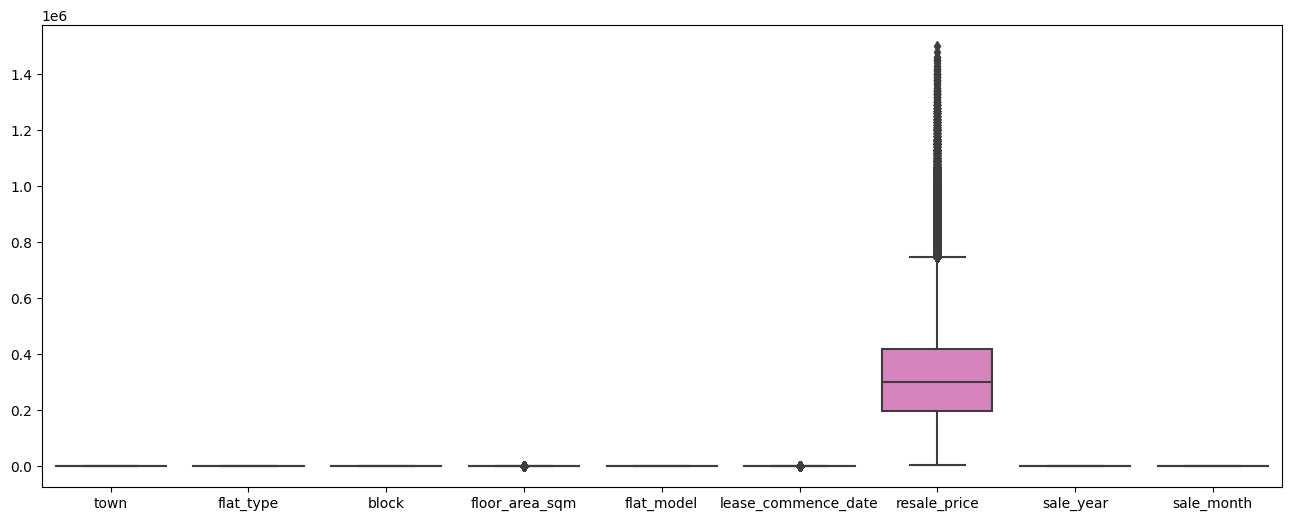

In [17]:
plt.figure(figsize=(16,6))
sns.boxplot(df_realestate_1)
plt.show()

In [19]:
# drop floor area sqm null values
df_realestate_1.dropna(subset=['floor_area_sqm'], inplace=True)

## Feature Selection

In [ ]:
# Corr
corr_data = df_realestate_1.corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr_data,annot=True,cmap="coolwarm",fmt=".2f")

In [20]:
# flat type and floor areq sqm is highly correlated.
# so we can drop flat type
df_realestate_1.drop("flat_type", axis=1, inplace=True)

# Resale Price Prediction - Regression Model

In [21]:
y = df_realestate_1['resale_price']
x = df_realestate_1.drop('resale_price', axis =1)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((679393, 7), (169849, 7), (679393,), (169849,))

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

# **Checking with differnet regression models**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators=23, random_state=40)
model_rfr.fit(x_train, y_train)
y_pred= model_rfr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:",metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(x_train, y_train)
y_pred= model_lr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:",metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_pred=model_dtr.predict(x_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:",metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor().fit(x_train, y_train)
y_pred= model_gbr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:",metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_abr = AdaBoostRegressor().fit(x_train, y_train)
y_pred= model_abr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:",metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
model_hgbr = HistGradientBoostingRegressor ().fit(x_train, y_train)
y_pred= model_hgbr.predict(x_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:",metrics.r2_score(y_test, y_pred))

In [ ]:
# Random forest regression model is selected as best model
# it gives the best r2 score

In [ ]:
# Test data1
test_data=np.array([[26.0,	834,142,3,1988,2023,12]])
y_pred=model_rfr.predict(test_data)
print("SP:",y_pred[0])

In [ ]:
# Test data2
test_data=np.array([[0,235,67,12,1977,1990,1]])
y_pred=model_rfr.predict(test_data)
print("SP:",y_pred[0])

# **Create Pickle file**

In [29]:
import pickle
with open('/content/regression_model.pkl', 'wb') as f:
    pickle.dump(model_rfr, f)

In [ ]:
test_data=np.array([[0,235,67,12,1977,1990,1]])
with open('/content/regression_model.pkl', 'rb') as f:
    model = pickle.load(f)
y_pred = model.predict(test_data)
y_pred[0]

In [ ]:
pip install streamlit

In [ ]:
df_realestate_1.info()

In [ ]:
df_realestate

# **Streamlit file**

In [48]:
# Streamlit file for deployment
%%writefile app.py
import numpy as np
import pickle
import streamlit as st
from PIL import Image
from sklearn.preprocessing import LabelEncoder

#streamlit  page setting
icon = Image.open("house.jpg")
st.set_page_config(page_title= "Real Estate - Kavitha",
                page_icon= icon,
                layout= "wide",
                initial_sidebar_state= "expanded",
                )

st.subheader(":blue[Singapore Real Estate]")
tab1,tab2=st.tabs([":blue[Resale Price]",":blue[About]"])

with tab1:
  col1,col2,col3=st.columns(3)

  with col1:
    txt_town=st.text_input("Enter Town")
    txt_block=st.number_input("Enter Block : ")
    txt_floor_area_sqm=st.number_input("Enter the Floor Area sqm:")

  with col2:
    txt_flat_model=st.text_input("Enter the Flat Model:")
    txt_lease_commence_date=st.number_input("Enter Lease Commence Date:")

  with col3:
    txt_sale_year=st.number_input("Enter the sale year")
    txt_sale_month=st.number_input("Enter the sale month")



  label_encoder = LabelEncoder()
  label_encoder.fit([txt_town])
  encoded_town=label_encoder.transform([txt_town])

  label_encoder.fit([txt_flat_model])
  encoded_flat_model = label_encoder.transform([txt_flat_model])

  if st.button("Predict Selling Price", key="predict"):

      # make array for all user input values in required order for model prediction
      user_data = np.array([[int(encoded_town[0]),int(txt_block),
                          float(txt_floor_area_sqm),int(encoded_flat_model[0]),int(txt_lease_commence_date),
                          int(txt_sale_year),int(txt_sale_month)]])

      # load the regression pickle model
      with open('/content/regression_model.pkl', 'rb') as f:
          model = pickle.load(f)

      # model predict the selling price based on user input
      y_pred = model.predict(user_data)

      # inverse transformation for log transformation data
      selling_price = y_pred[0]

      # round the value with 2 decimal point
      selling_price = round(selling_price, 2)
      st.write("Predicted Selling Price: ", selling_price)


with tab2:
    st.caption(":blue[Overview:]")
    st.caption(":blue[Original Copper dataset has null and zero values]")
    st.caption(":blue[Data Cleaning has done for the all the null values and negative values]")
    st.caption(":blue[log transformation is applied for selling price prediction]")
    st.caption(":blue[3 features(quantity tons, width and thickness) has been taken for selling price prediction]")
    st.caption(":blue[Won and lost status has been taken for prediction other status data has been removed]")
    st.caption(":blue[all features has been taken for status prediction except item date and delivery date]")

Overwriting app.py


In [ ]:
!npm install localtunnel

In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com